In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# creamoa data set artifiail con los datos más comunes
np.random.seed(42)
n = 10000
df = pd.DataFrame({
    'auction_id': np.arange(n),
    'bid_price': np.random.uniform(0.1, 2.0, n),
    'win_price': np.random.uniform(0.1, 2.0, n),
    'click': np.random.binomial(1, 0.05, n),
    'conversion': np.random.binomial(1, 0.01, n),
    'hour': np.random.randint(0, 24, n),
    'device': np.random.choice(['mobile', 'desktop', 'tablet'], n),
    'keyword': np.random.choice(['shoes', 'phone', 'hotel', 'car'], n)
})
df['cost'] = np.where(df['bid_price'] >= df['win_price'], df['win_price'], 0)
df['impression'] = 1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   auction_id  10000 non-null  int32  
 1   bid_price   10000 non-null  float64
 2   win_price   10000 non-null  float64
 3   click       10000 non-null  int32  
 4   conversion  10000 non-null  int32  
 5   hour        10000 non-null  int32  
 6   device      10000 non-null  object 
 7   keyword     10000 non-null  object 
 8   cost        10000 non-null  float64
 9   impression  10000 non-null  int64  
dtypes: float64(3), int32(4), int64(1), object(2)
memory usage: 625.1+ KB


In [9]:
df.describe()

,auction_id,bid_price,win_price,click,conversion,hour,cost,impression
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0
mean,4999.50000,1.038903,1.058607,0.049400,0.009600,11.524600,0.360176,1.0
std,2886.89568,0.546497,0.549660,0.216713,0.097513,6.969537,0.483379,0.0
min,0.00000,0.100022,0.100300,0.000000,0.000000,0.000000,0.000000,1.0
25%,2499.75000,0.568025,0.582497,0.000000,0.000000,5.000000,0.000000,1.0
50%,4999.50000,1.035804,1.061204,0.000000,0.000000,11.000000,0.000000,1.0
75%,7499.25000,1.506012,1.537311,0.000000,0.000000,18.000000,0.646911,1.0
max,9999.00000,1.999464,1.999857,1.000000,1.000000,23.000000,1.980170,1.0


In [11]:
df.isnull().sum()

auction_id    0
bid_price     0
win_price     0
click         0
conversion    0
hour          0
device        0
keyword       0
cost          0
impression    0
dtype: int64

In [38]:
df.to_csv('Smart_Bidding.csv')

# EDA

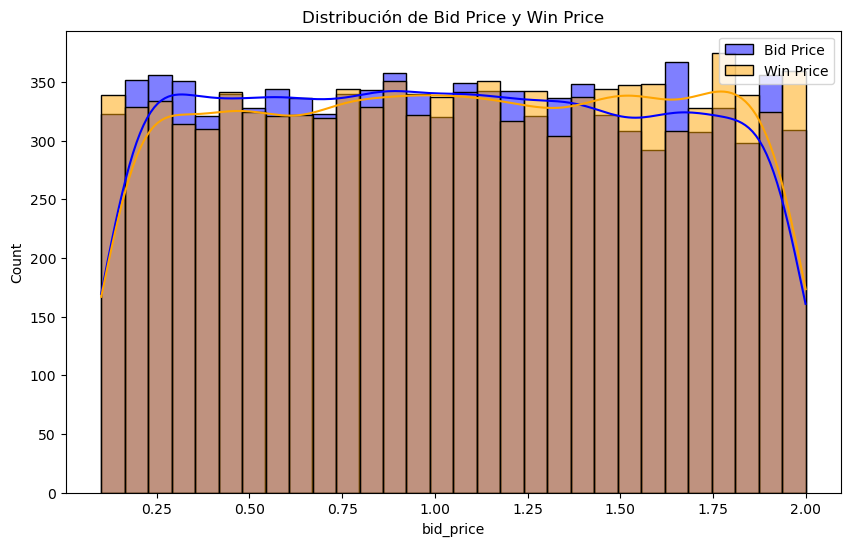

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['bid_price'], bins=30, color='blue', alpha=0.5, label='Bid Price', kde=True)
sns.histplot(df['win_price'], bins=30, color='orange', alpha=0.5, label='Win Price', kde=True)
plt.title('Distribución de Bid Price y Win Price')
plt.legend()
plt.xlabel('bid_price')
plt.ylabel('Count')
plt.show()


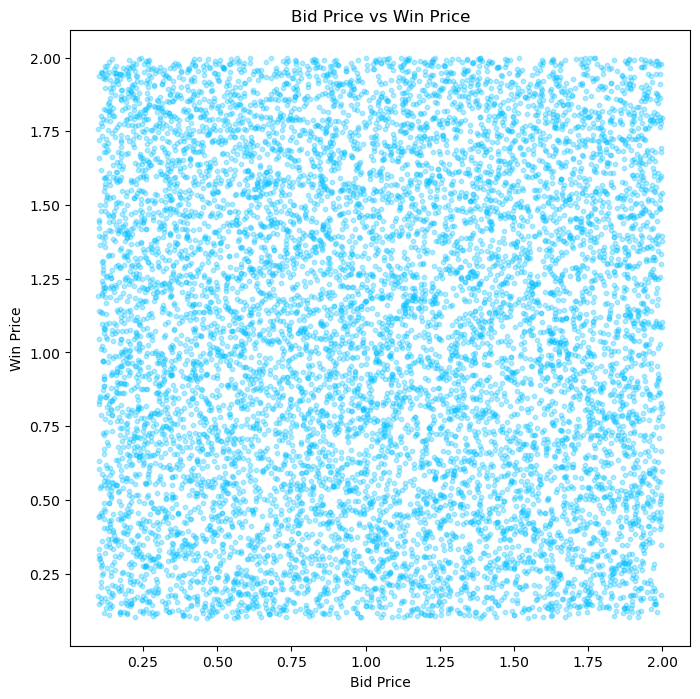

In [32]:
plt.figure(figsize=(8,8))
plt.scatter(df['bid_price'], df['win_price'], alpha=0.3, s=10, color='deepskyblue')
plt.title('Bid Price vs Win Price')
plt.xlabel('Bid Price')
plt.ylabel('Win Price')
plt.show()


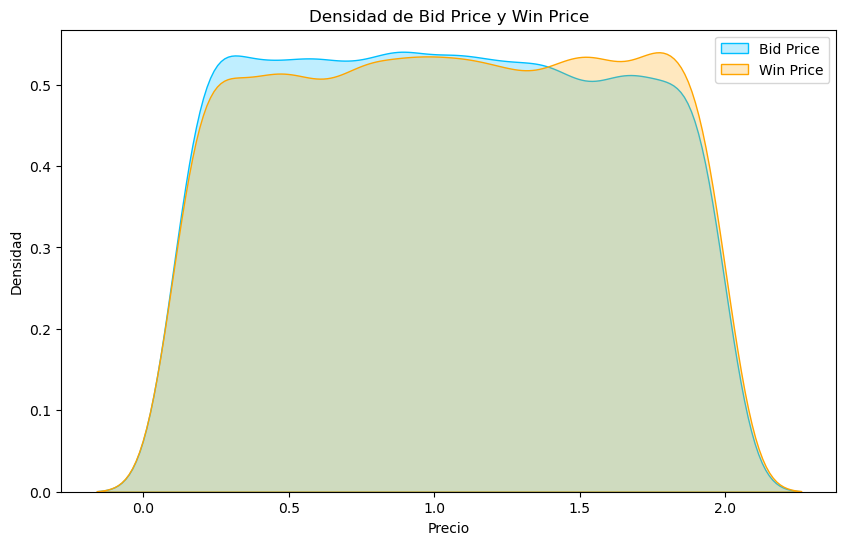

In [34]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['bid_price'], label='Bid Price', shade=True, color='deepskyblue')
sns.kdeplot(df['win_price'], label='Win Price', shade=True, color='orange')
plt.title('Densidad de Bid Price y Win Price')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.legend()
plt.show()


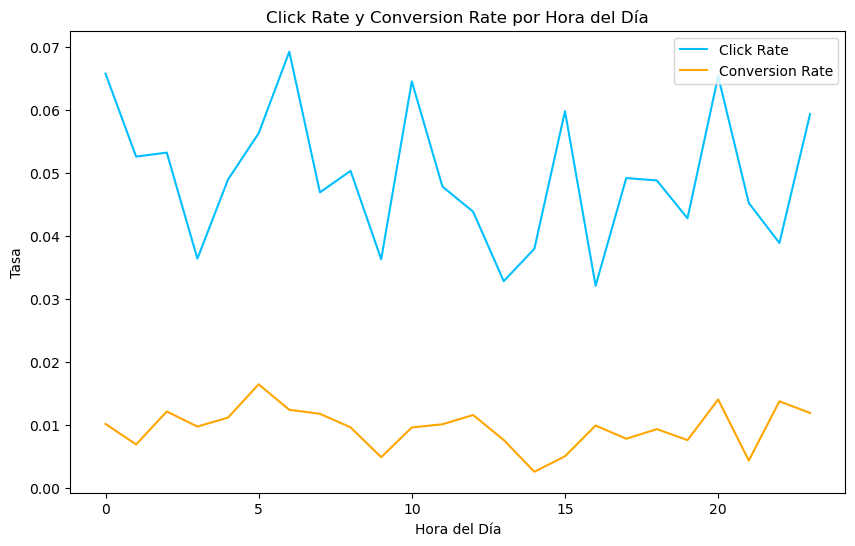

In [36]:
click_rate_hour = df.groupby('hour')['click'].mean()
conversion_rate_hour = df.groupby('hour')['conversion'].mean()

plt.figure(figsize=(10,6))
plt.plot(click_rate_hour.index, click_rate_hour.values, label='Click Rate', color='deepskyblue')
plt.plot(conversion_rate_hour.index, conversion_rate_hour.values, label='Conversion Rate', color='orange')
plt.title('Click Rate y Conversion Rate por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Tasa')
plt.legend()
plt.show()


In [76]:
df1=df

In [86]:
df1['hour'].applymap(lambda x: 'mayor' if x>18 else 'menor')

AttributeError: 'Series' object has no attribute 'applymap'

In [74]:
df1

10